<a href="https://colab.research.google.com/github/Gyobeom/Seoul_Public_Bike_Data_analysis/blob/main/201644056_brian_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울특별시 2021~2022 상반기 공공자전거 데이터 분석

###프로젝트 목적
서울 특별시에서 운영중인 공공자전거(따릉이)의 각 구 이용량을 전년도 상반기 데이터 및 올해 상반기 데이터를 분석하고,  

In [ ]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 73 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.rc('font', family='NanumBarunGothic')

forders_2021 = os.listdir('/content/2021_data/store')
forders_2022 = os.listdir('/content/2022_data/store')

df_all_2021 = pd.DataFrame()
df_all_2022 = pd.DataFrame()

cycle_store_data = []
store_city= []
store_data_test = []


#2021_csv 파일 합치기
for i in range(len(forders_2021)):
        file = '/content/2021_data/store/'+forders_2021[i]
        df = pd.read_csv(file,encoding='utf-8' )
        if forders_2021[i] == '2021_대여소_1.csv':
          df['month'] = 1
        elif forders_2021[i] == '2021_대여소_2.csv':
          df['month'] = 2
        elif forders_2021[i] == '2021_대여소_3.csv':
          df['month'] = 3
        elif forders_2021[i] == '2021_대여소_4.csv':
          df['month'] = 4
        elif forders_2021[i] == '2021_대여소_5.csv':
          df['month'] = 5
        elif forders_2021[i] == '2021_대여소_6.csv':
          df['month'] = 6
        df_all_2021 = pd.concat([df_all_2021, df])
        df_all_2021.reset_index(drop=True, inplace=True)

for i in range(len(forders_2022)):
        file = '/content/2022_data/store/'+forders_2022[i]
        df_2022 = pd.read_csv(file,encoding='cp949' )
        if forders_2022[i] == '2022_대여소_1.csv':
          df_2022['month'] = 1
        elif forders_2022[i] == '2022_대여소_2.csv':
          df_2022['month'] = 2
        elif forders_2022[i] == '2022_대여소_3.csv':
          df_2022['month'] = 3
        elif forders_2022[i] == '2022_대여소_4.csv':
          df_2022['month'] = 4
        elif forders_2022[i] == '2022_대여소_5.csv':
          df_2022['month'] = 5
        elif forders_2022[i] == '2022_대여소_6.csv':
          df_2022['month'] = 6
        df_all_2022 = pd.concat([df_all_2022, df_2022])
        df_all_2022.reset_index(drop=True, inplace=True)


#서울시 구 분류 배열
store_city = df_all_2021['대여소 그룹'].values.tolist()
store_city = list(dict.fromkeys(store_city))

store_city_2022 = df_all_2022['대여소 그룹'].values.tolist()
store_city_2022 = list(dict.fromkeys(store_city_2022))

store_city.remove('정비센터')

print(df_all_2021)
print(df_all_2022)


      대여소 그룹               대여소 명  대여 일자 / 월  대여 건수  month
0        중랑구         1429. 장안중학교     202102    464      2
1        중랑구          1430. 중랑구청     202102    509      2
2        중랑구      1431. 중랑구청 사거리     202102    811      2
3        중랑구      1433. 중화역 2번출구     202102    795      2
4        중랑구     1434. 홈플러스 면목동점     202102    446      2
...      ...                 ...        ...    ...    ...
11771    중랑구   4808. 신내2동 주민센터 앞     202104    440      4
11772    중랑구  4809. 동성1,2차 아파트 앞     202104    992      4
11773    중랑구    4811. 한양수자인아파트 앞     202104    270      4
11774    중랑구      4812. 묵동 이마트 앞     202104    934      4
11775    중랑구     4813. 망우로 버거킹 앞     202104   1409      4

[11776 rows x 5 columns]
      대여소 그룹    팀명                    대여소 명  대여 건수  month
0        강동구  천호1팀          1014. 강동구평생학습관앞      3      1
1        성동구   테스트                9980. 에이텍      3      1
2        동작구  영남2팀           2063. 대방역 4번출구      4      1
3        서초구  이수1팀             2286. 탑성마을입구   

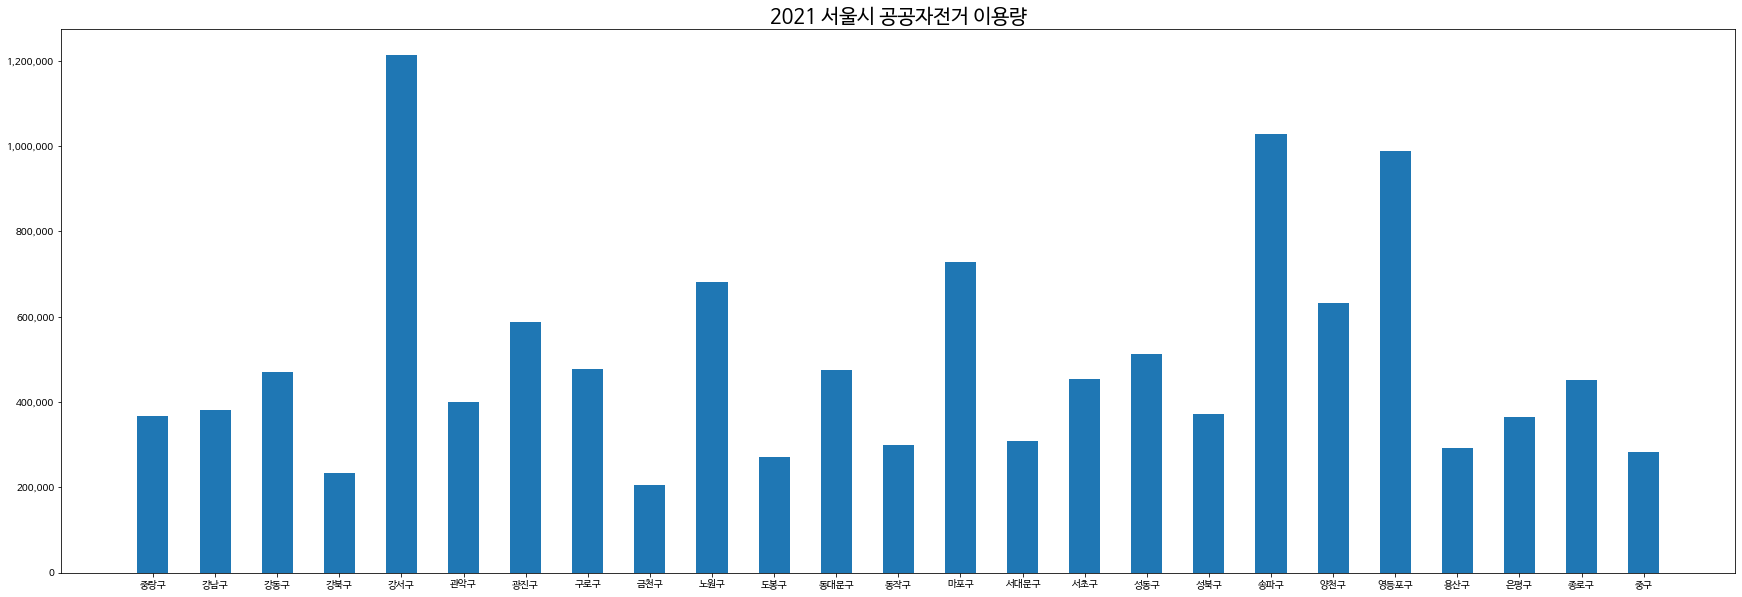

In [ ]:
# 2021_공공자전거_1~6월 총 데이터\
import matplotlib.pyplot as plt
import seaborn as sns
cycle_store_data = []
for i in store_city:
  temp = df_all_2021.loc[(df_all_2021['대여소 그룹'] == i)]
  cycle_store_data.append(temp['대여 건수'].sum(axis=0))

x = np.arange(25)
plt.figure(figsize=(30, 10))
plt.bar(x, cycle_store_data,width=0.5)
plt.xticks(x,store_city)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('2021 서울시 공공자전거 이용량',size=20)
plt.show()

([<matplotlib.patches.Wedge at 0x7fa91d27a280>,
 [Text(1.0953063459879888, 0.10150866188872909, '중랑구'),
  Text(1.056859257032922, 0.305038539899174, '강남구'),
  Text(0.9676758336612332, 0.5230712006486663, '강동구'),
  Text(0.860421447781391, 0.6853283389717482, '강북구'),
  Text(0.559964521980295, 0.9468050137823415, '강서구'),
  Text(0.14056469677269687, 1.0909819274493964, '관악구'),
  Text(-0.1321509724191631, 1.0920330217024894, '광진구'),
  Text(-0.41700919390716706, 1.017891611222381, '구로구'),
  Text(-0.5850005694366103, 0.9315440589466727, '금천구'),
  Text(-0.7766624348109831, 0.7789707711804569, '노원구'),
  Text(-0.9396047933085514, 0.5719640131962802, '도봉구'),
  Text(-1.0300112876880294, 0.38610458069705333, '동대문구'),
  Text(-1.085321869141328, 0.17909896806954087, '동작구'),
  Text(-1.0950183154119213, -0.10457001918541681, '마포구'),
  Text(-1.030987383930846, -0.3834905659536235, '서대문구'),
  Text(-0.9390260647135749, -0.5729136495044759, '서초구'),
  Text(-0.7735419817870144, -0.782069563666186, '성동구'),
  

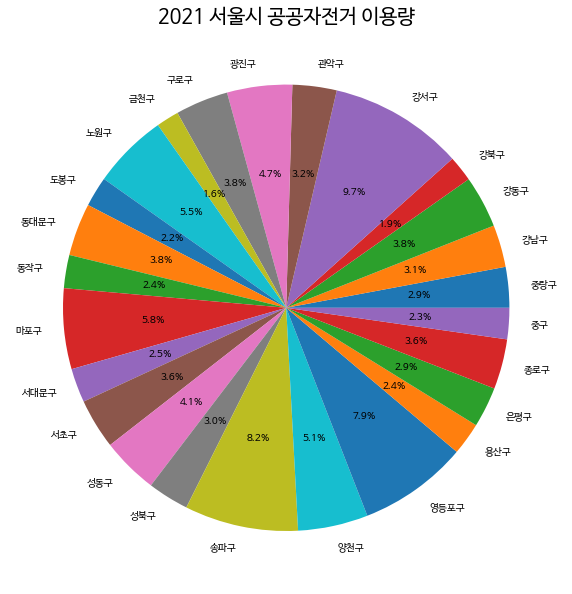

In [ ]:
plt.figure(figsize = (10,14))
plt.title('2021 서울시 공공자전거 이용량',size=20)
plt.pie(cycle_store_data,labels=store_city,autopct='%1.1f%%')

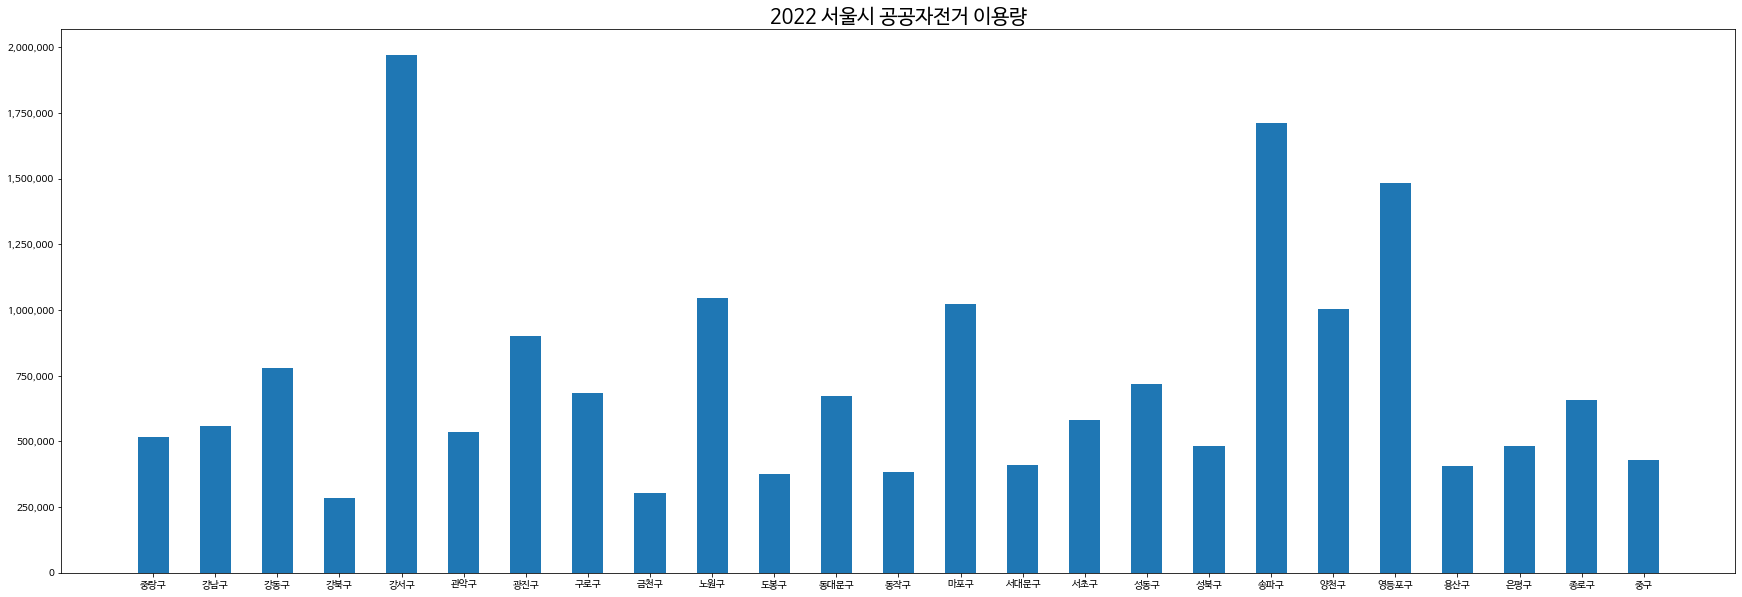

In [ ]:
# 2022_공공자전거_1~6월 총 데이터
cycle_store_data = []
for i in store_city:
  temp = df_all_2022.loc[(df_all_2022['대여소 그룹'] == i)]
  cycle_store_data.append(temp['대여 건수'].sum(axis=0))

x = np.arange(25)
plt.figure(figsize=(30, 10))
plt.bar(x, cycle_store_data,width=0.5)
plt.xticks(x,store_city)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('2022 서울시 공공자전거 이용량',size=20)
plt.show()


([<matplotlib.patches.Wedge at 0x7fa91b985ee0>,
 [Text(1.0957089464600849, 0.09706649600831002, '중랑구'),
  Text(1.0596127185592235, 0.2953318246778227, '강남구'),
  Text(0.9652655331867492, 0.5275058771631848, '강동구'),
  Text(0.8539665984439913, 0.6933549226348648, '강북구'),
  Text(0.5311887259093354, 0.9632437580731148, '강서구'),
  Text(0.08371257063350304, 1.0968100134106777, '관악구'),
  Text(-0.1849835821676967, 1.0843343923017508, '광진구'),
  Text(-0.4676046162112523, 0.9956635590890769, '구로구'),
  Text(-0.6279212595702358, 0.903169359411472, '금천구'),
  Text(-0.8177080836990376, 0.7357672796837651, '노원구'),
  Text(-0.9704564582193891, 0.517894065133285, '도봉구'),
  Text(-1.047122135416152, 0.33694989764283645, '동대문구'),
  Text(-1.0906261821220653, 0.14329874692350883, '동작구'),
  Text(-1.0934200560508325, -0.12013567757246142, '마포구'),
  Text(-1.0318420231674028, -0.3811850459105144, '서대문구'),
  Text(-0.9529879400201758, -0.5493759970876976, '서초구'),
  Text(-0.808801942494753, -0.7455463887758524, '성동구'),

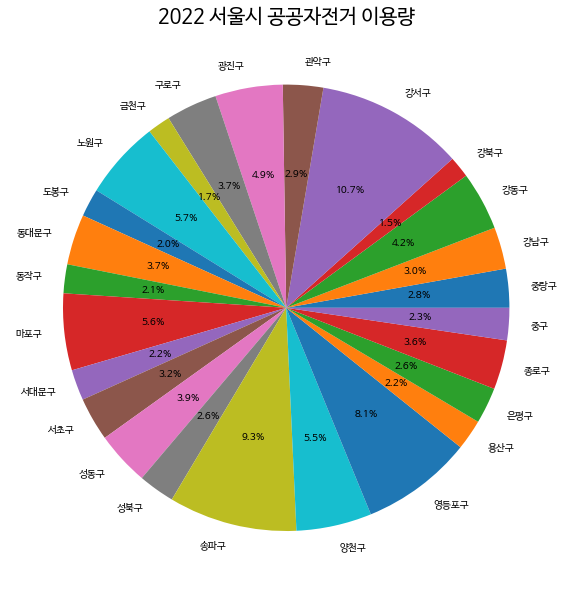

In [ ]:
plt.figure(figsize = (10,14))
plt.title('2022 서울시 공공자전거 이용량',size=20)
plt.pie(cycle_store_data,labels=store_city,autopct='%1.1f%%')

237143.96
      강동구     강서구     광진구     노원구     마포구     송파구     양천구    영등포구
1   26158   75019   38357   41994   48660   54819   43330   64359
2       0       0       0       0       0       0       0       0
3   77624  205079  109722  110214  130789  174600  107902  183623
4  110544  282106  145522  161414  179715  254225  144977  249527
5  112206  289249  139373  167247  173092  248892  151065  229684
6  143699  361675  155056  200594  195893  294526  185618  260526
      강동구     강서구     광진구     노원구     마포구     송파구     양천구    영등포구
1   60070  165113   66779   77986   73036  124915   86530  111625
2   56951  148836   64919   74480   69341  121001   77765  107367
3   98655  251120  119383  138449  136611  216657  128327  194656
4   98655  251120  119383  138449  136611  216657  128327  194656
5  210937  527083  245020  287482  281943  471324  262718  396918
6  189847  483305  203223  244290  230808  397680  248675  337813


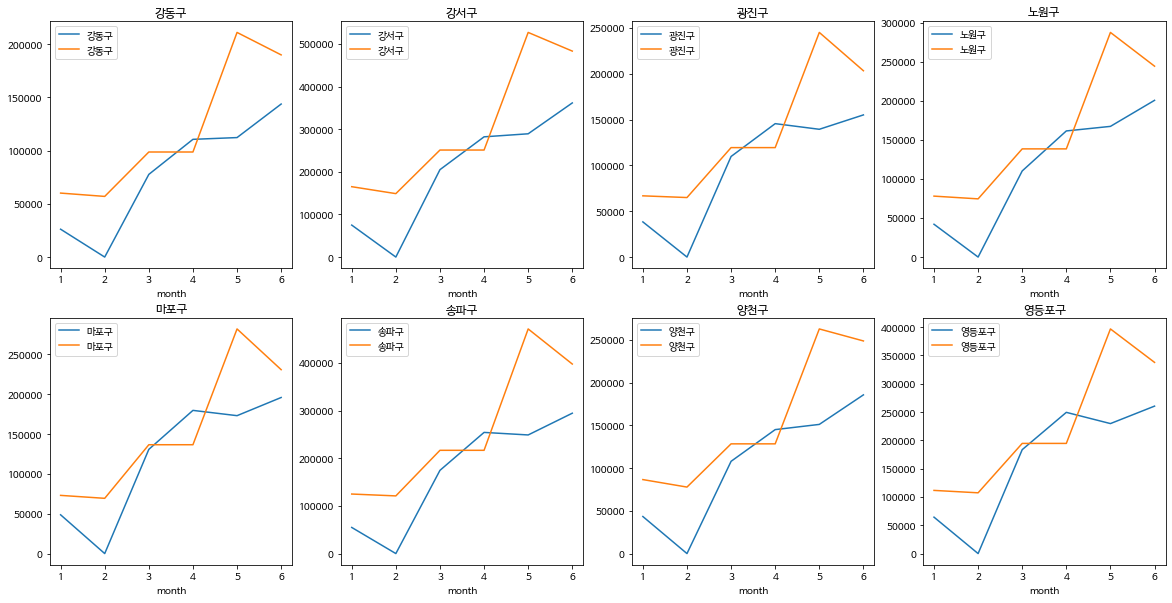

In [ ]:
# 2022_공공자전거_1~6월 평균 차 계산 평균 차 보다 높은 
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False
cycle_store_data_2021 = []
cycle_store_data_2022 = []
total_avg = 0
total_sum = 0
temp_sum = []
city_name = []

city_data_month_2021_1 = []
city_data_month_2021_2 = []
city_data_month_2021_3 = []
city_data_month_2021_4 = []
city_data_month_2021_5 = []
city_data_month_2021_6 = []

city_data_month_2022_1 = []
city_data_month_2022_2 = []
city_data_month_2022_3 = []
city_data_month_2022_4 = []
city_data_month_2022_5 = []
city_data_month_2022_6 = []

total_city_data_2021 = []
total_city_data_2022 = []


matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
plt.rc('font', family='NanumBarunGothic')

for i in store_city:
  temp_2021 = df_all_2021.loc[(df_all_2021['대여소 그룹'] == i)]
  temp_2022 = df_all_2022.loc[(df_all_2022['대여소 그룹'] == i)]
  cycle_store_data_2021.append(temp_2021['대여 건수'].sum(axis=0))
  cycle_store_data_2022.append(temp_2022['대여 건수'].sum(axis=0))

for i in range(len(cycle_store_data_2021)):
  if cycle_store_data_2021[i] > cycle_store_data_2022[i]:
    temp_sum.append(cycle_store_data_2021[i] - cycle_store_data_2022[i])
    total_sum += cycle_store_data_2021[i] - cycle_store_data_2022[i]
  else:
    temp_sum.append(cycle_store_data_2022[i] - cycle_store_data_2021[i])
    total_sum += cycle_store_data_2022[i] - cycle_store_data_2021[i]

total_avg = total_sum / 25
print(total_avg)

for i in temp_sum:
  if i > total_avg:
    city_name.append(store_city[temp_sum.index(i)])


for i in city_name:
  for k in range(6):
    if k == 0:
      temp = df_all_2021.loc[(df_all_2021['대여소 그룹'] == i) & (df_all_2021['month'] == k + 1)]
      city_data_month_2021_1.append(temp['대여 건수'].sum(axis=0))

      temp_2022 = df_all_2022.loc[(df_all_2022['대여소 그룹'] == i) & (df_all_2022['month'] == k + 1)]
      city_data_month_2022_1.append(temp_2022['대여 건수'].sum(axis=0))
    elif k == 1:
      temp = df_all_2021.loc[(df_all_2021['대여소 그룹'] == i) & (df_all_2021['month'] == k + 1)]
      city_data_month_2021_2.append(temp['대여 건수'].sum(axis=0))

      temp_2022 = df_all_2022.loc[(df_all_2022['대여소 그룹'] == i) & (df_all_2022['month'] == k + 1)]
      city_data_month_2022_2.append(temp_2022['대여 건수'].sum(axis=0))
    elif k == 2:
      temp = df_all_2021.loc[(df_all_2021['대여소 그룹'] == i) & (df_all_2021['month'] == k + 1)]
      city_data_month_2021_3.append(temp['대여 건수'].sum(axis=0))

      temp_2022 = df_all_2022.loc[(df_all_2022['대여소 그룹'] == i) & (df_all_2022['month'] == k + 1)]
      city_data_month_2022_3.append(temp_2022['대여 건수'].sum(axis=0))
    elif k == 3:
      temp = df_all_2021.loc[(df_all_2021['대여소 그룹'] == i) & (df_all_2021['month'] == k + 1)]
      city_data_month_2021_4.append(temp['대여 건수'].sum(axis=0))

      ttemp_2022mp = df_all_2022.loc[(df_all_2022['대여소 그룹'] == i) & (df_all_2022['month'] == k + 1)]
      city_data_month_2022_4.append(temp_2022['대여 건수'].sum(axis=0))
    elif k == 4:
      temp = df_all_2021.loc[(df_all_2021['대여소 그룹'] == i) & (df_all_2021['month'] == k + 1)]
      city_data_month_2021_5.append(temp['대여 건수'].sum(axis=0))

      temp_2022 = df_all_2022.loc[(df_all_2022['대여소 그룹'] == i) & (df_all_2022['month'] == k + 1)]
      city_data_month_2022_5.append(temp_2022['대여 건수'].sum(axis=0))
    elif k == 5:
      temp = df_all_2021.loc[(df_all_2021['대여소 그룹'] == i) & (df_all_2021['month'] == k + 1)]
      city_data_month_2021_6.append(temp['대여 건수'].sum(axis=0))

      temp_2022 = df_all_2022.loc[(df_all_2022['대여소 그룹'] == i) & (df_all_2022['month'] == k + 1)]
      city_data_month_2022_6.append(temp_2022['대여 건수'].sum(axis=0))




total_city_data_2021.append(city_data_month_2021_1)
total_city_data_2021.append(city_data_month_2021_2)
total_city_data_2021.append(city_data_month_2021_3)
total_city_data_2021.append(city_data_month_2021_4)
total_city_data_2021.append(city_data_month_2021_5)
total_city_data_2021.append(city_data_month_2021_6)

total_city_data_2022.append(city_data_month_2022_1)
total_city_data_2022.append(city_data_month_2022_2)
total_city_data_2022.append(city_data_month_2022_3)
total_city_data_2022.append(city_data_month_2022_4)
total_city_data_2022.append(city_data_month_2022_5)
total_city_data_2022.append(city_data_month_2022_6)

df_list_2021 = pd.DataFrame(total_city_data_2021, columns=city_name)
df_list_2021.index = df_list_2021.index + 1

df_list_2022 = pd.DataFrame(total_city_data_2022, columns=city_name)
df_list_2022.index = df_list_2022.index + 1

print(df_list_2021)
print(df_list_2022)

temp = []
temp2 = []
temp3 = []
ax = []
fig=plt.figure(figsize=(20,10))
ax.append(fig.add_subplot(2,4,1))
ax.append(fig.add_subplot(2,4,2))
ax.append(fig.add_subplot(2,4,3))
ax.append(fig.add_subplot(2,4,4))
ax.append(fig.add_subplot(2,4,5))
ax.append(fig.add_subplot(2,4,6))
ax.append(fig.add_subplot(2,4,7))
ax.append(fig.add_subplot(2,4,8))

for i in city_name:
  temp = df_list_2021.loc[:,i].to_list()
  temp2 = df_list_2022.loc[:,i].to_list()
  df = pd.DataFrame(temp,columns=[i])
  df_2 = pd.DataFrame(temp2,columns=[i])
  a = pd.concat([df,df_2] ,axis=1)
  a.index = a.index + 1
  a.plot(y=[i],ax=ax[city_name.index(i)])
  ax[city_name.index(i)].set_title(i)
  ax[city_name.index(i)].set_xlabel("month")

#df_new = pd.concat(temp,temp2)
#plt.plot(df_list2[['month']],df_list2[0])



['10대', '20대', '30대', '40대', '50대', '60대', '70대이상', '기타']




([<matplotlib.patches.Wedge at 0x7fa91b545040>,
 [Text(1.1905751333499823, 0.5700270623827185, '10대'),
  Text(-0.7199098896631483, 1.1064039726814043, '20대'),
  Text(-0.7779745612814151, -1.066374972511541, '30대'),
  Text(0.612571959710335, -1.169254289783296, '40대'),
  Text(1.2021164805801894, -0.5452668769671409, '50대'),
  Text(1.3095486257365394, -0.1657781554715245, '60대'),
  Text(1.3187507681695436, -0.05741438367028537, '70대이상'),
  Text(1.3198349522630146, -0.020873398977795436, '기타')],
 [Text(0.6494046181908995, 0.31092385220875557, '14.2%'),
  Text(-0.3926781216344445, 0.6034930760080387, '39.9%'),
  Text(-0.42434976069895364, -0.581659075915386, '21.6%'),
  Text(0.33413015984200084, -0.637775067154525, '13.8%'),
  Text(0.6556998984982851, -0.2974182965275314, '7.3%'),
  Text(0.7142992504017487, -0.09042444843901336, '2.2%'),
  Text(0.7193186008197511, -0.03131693654742838, '0.4%'),
  Text(0.7199099739616442, -0.011385490351524781, '0.5%')])

<Figure size 1440x720 with 0 Axes>

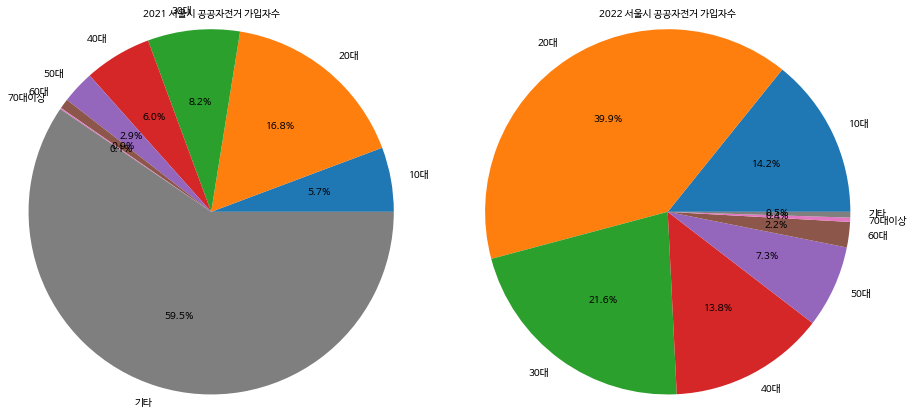

In [ ]:
import pandas as pd
import itertools
file = '/content/user_data/2021/2021_data.csv'
file2 = '/content/user_data/2022/2022_data.csv'
df_2021 = pd.read_csv(file,encoding="cp949" )
df_2022 = pd.read_csv(file2,encoding='cp949')

fig=plt.figure(figsize=(20,10))
user_age = df_2021[['연령대코드']].drop_duplicates()
user_age = user_age.values.tolist()
user_age = list(itertools.chain.from_iterable(user_age))
print(user_age)


# # temp = df_2021.loc[(df_2021['가입일시'] == 202101) & (df_2021['연령대코드'] == user_age[3].values)]

# # print(temp)

total_2021_user_data = []
total_2022_user_data = []

for i in user_age:
  temp_2021 = df_2021.loc[(df_2021['연령대코드'] == i)]
  temp_2022 = df_2022.loc[(df_2022['연령대코드']) == i]
  total_2021_user_data.append(temp_2021['가입 수'].sum(axis=0))
  total_2022_user_data.append(temp_2022['가입 수'].sum(axis=0))


fig=plt.figure(figsize=(15,20))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)


ax1.set_title('2021 서울시 공공자전거 가입자수',size=10)
ax2.set_title('2022 서울시 공공자전거 가입자수',size=10)
print('\n')
ax1.pie(total_2021_user_data,labels=user_age,autopct='%1.1f%%' ,radius = 1.2)
ax2.pie(total_2022_user_data,labels=user_age,autopct='%1.1f%%' ,radius = 1.2)

 



